In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from helper_models import RuleClassifier
from comparers import ModelComparer, plot_decision_boundary

In [2]:
x1_min, x1_max = -100.0, 100.0
x2_min, x2_max = -100.0, 100.0
mesh_step_size = 2.0
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, mesh_step_size), np.arange(x2_min, x2_max, mesh_step_size))
X = np.c_[xx.ravel(), yy.ravel()]

In [3]:
def decision_rule(X):
    return (X[:, 0] > 0).astype(int)

In [4]:
y = decision_rule(X)

In [5]:
clf_a = RuleClassifier(decision_rule)
clf_a.fit(X, y)

RuleClassifier(decision_rule=<function decision_rule at 0x11fb45430>)

In [6]:
def modified_decision_rule(X):
    y = decision_rule(X).astype(bool)
    y ^= (-70 < X[:, 0]) & (X[:, 0] <= -60) & (10 < X[:, 1] ) & (X[:, 1] <= 20)
    y ^= (-70 < X[:, 0]) & (X[:, 0] <= -60) & (-20 < X[:, 1] ) & (X[:, 1] <= -10)
    y ^= (-10 < X[:, 0]) & (X[:, 0] <= 0) & (-10 < X[:, 1] ) & (X[:, 1] <= 0)
    y ^= (0 < X[:, 0]) & (X[:, 0] <= 10) & (0 < X[:, 1] ) & (X[:, 1] <= 10)
    y ^= (-20 < X[:, 0]) & (X[:, 0] <= -10) & (-20 < X[:, 1] ) & (X[:, 1] <= -10)
    y ^= (10 < X[:, 0]) & (X[:, 0] <= 20) & (10 < X[:, 1] ) & (X[:, 1] <= 20)
    y ^= (-10 < X[:, 0]) & (X[:, 0] <= 0) & (-30 < X[:, 1] ) & (X[:, 1] <= -20)
    y ^= (0 < X[:, 0]) & (X[:, 0] <= 10) & (20 < X[:, 1] ) & (X[:, 1] <= 30)
    return y.astype(int)

clf_b = RuleClassifier(modified_decision_rule)
clf_b.fit(X, y)

RuleClassifier(decision_rule=<function modified_decision_rule at 0x11fb571f0>)

In [7]:
pd.Series(clf_a.predict(X)).value_counts()

0    5100
1    4900
dtype: int64

In [8]:
pd.Series(clf_b.predict(X)).value_counts()

0    5050
1    4950
dtype: int64

In [9]:
comparer = ModelComparer(clf_a, clf_b, np.array(['x1', 'x2']))

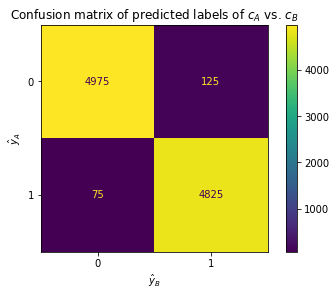

In [10]:
comparer.plot_confusion_matrix(X)

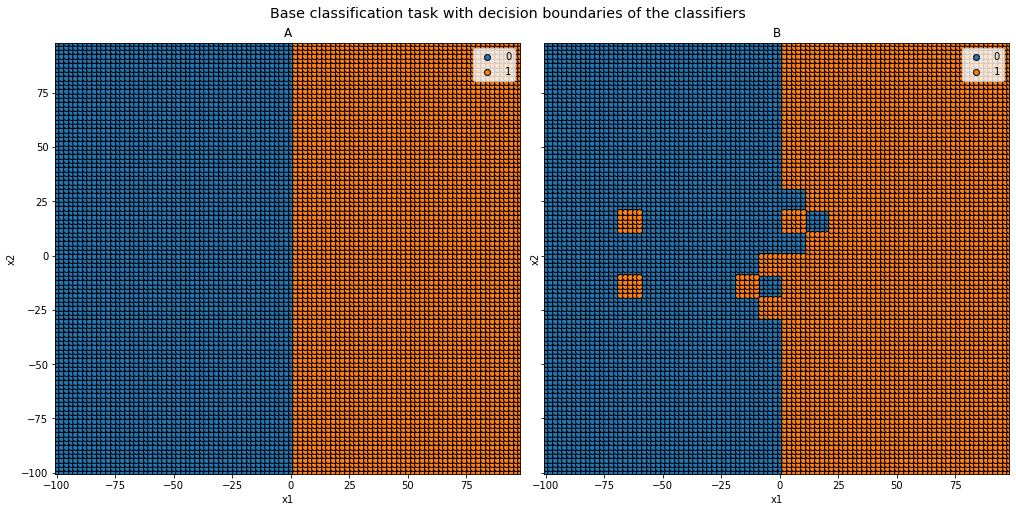

In [11]:
comparer.plot_individual_clf_decision_boundaries(X)

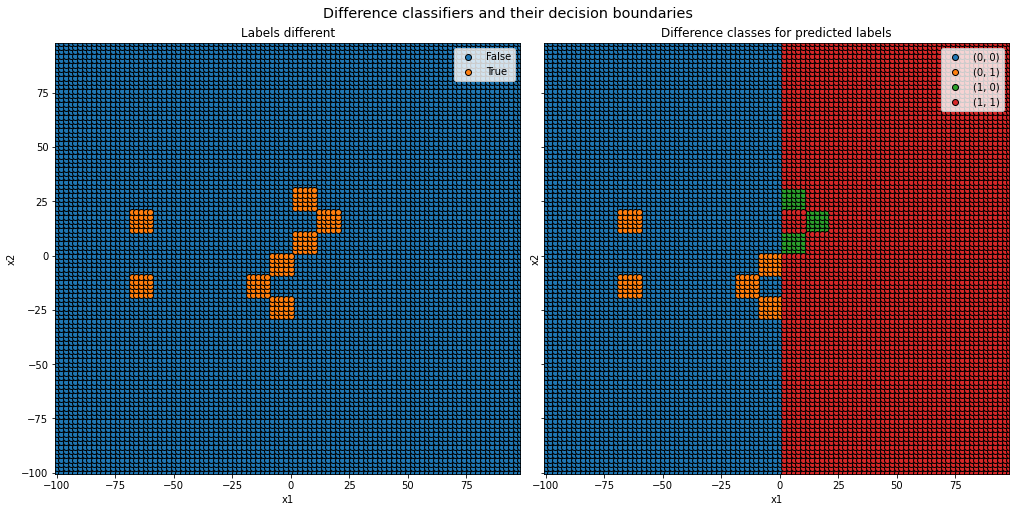

In [12]:
comparer.plot_decision_boundaries(X)